<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# 1. Definición del problema
print('El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.')
print(f"Como el objetivo es encontrar el valor medio, la variable objetivo sería target, en función del resto de características")
print(f"Dimensiones del dataset: {housing.shape}")
print(f"Características: {list(housing.columns[:-1])}")


El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.
Como el objetivo es encontrar el valor medio, la variable objetivo sería target, en función del resto de características
Dimensiones del dataset: (20640, 9)
Características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
# 2. Estadística descriptiva
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
housing.columns[:]

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

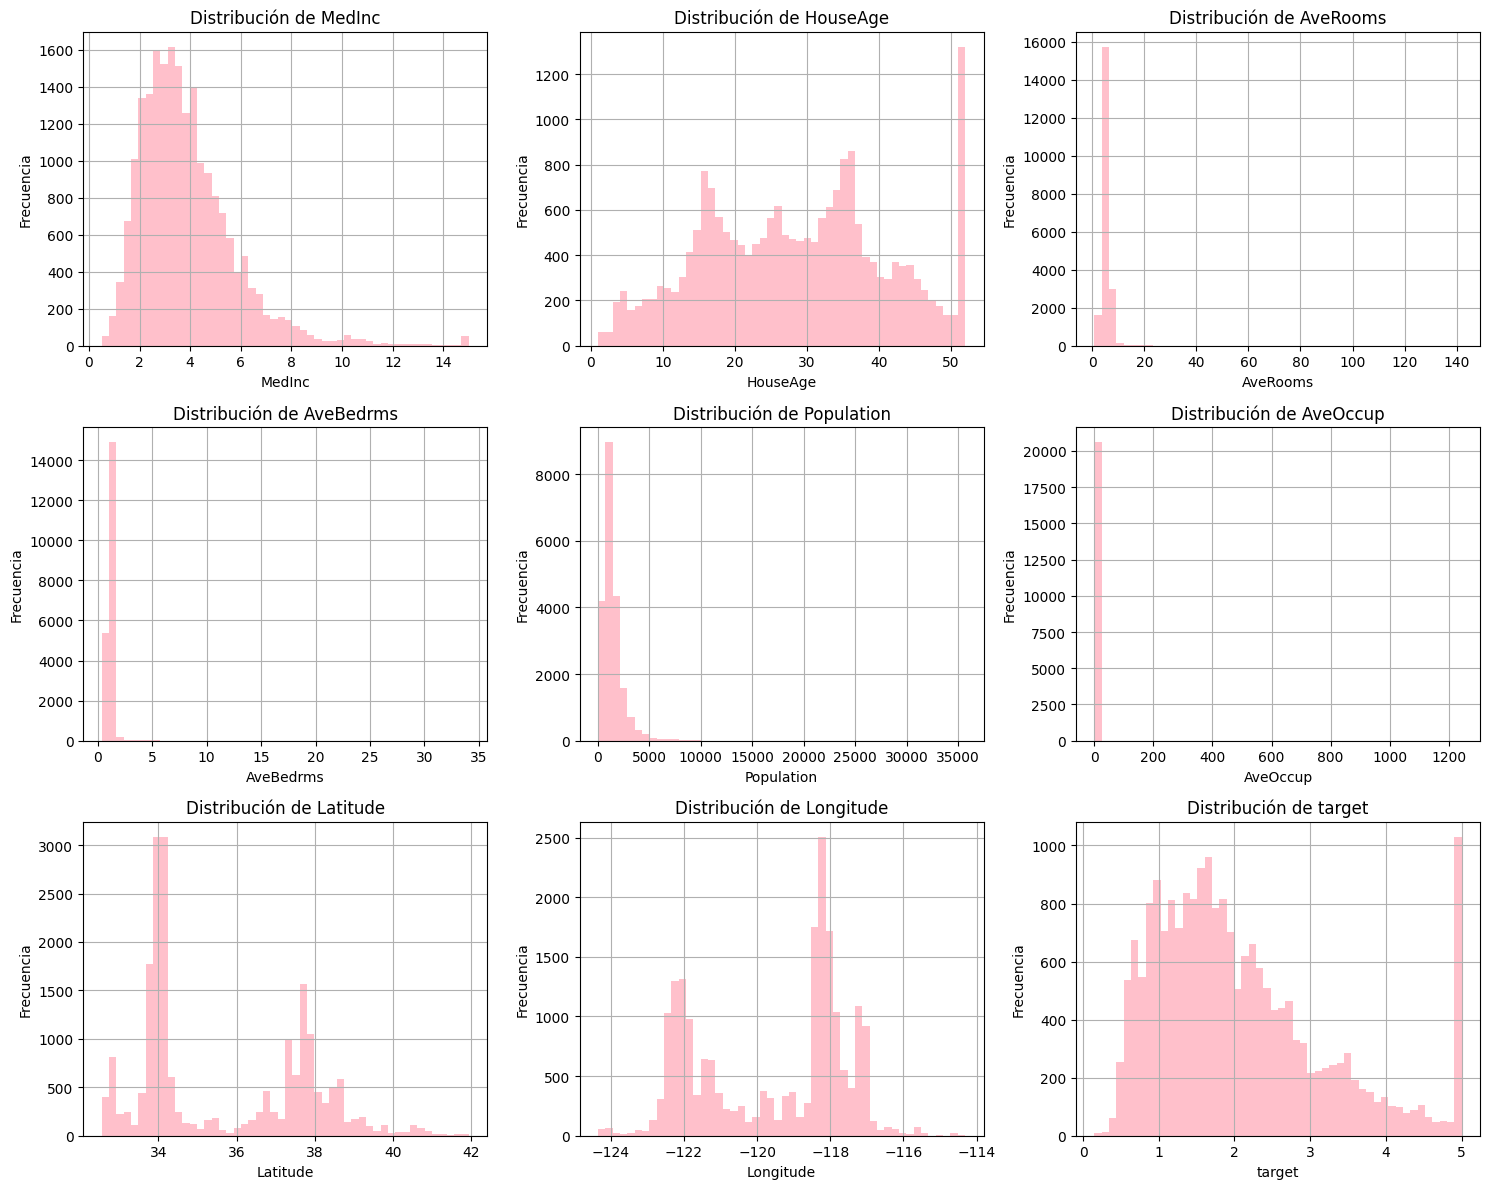

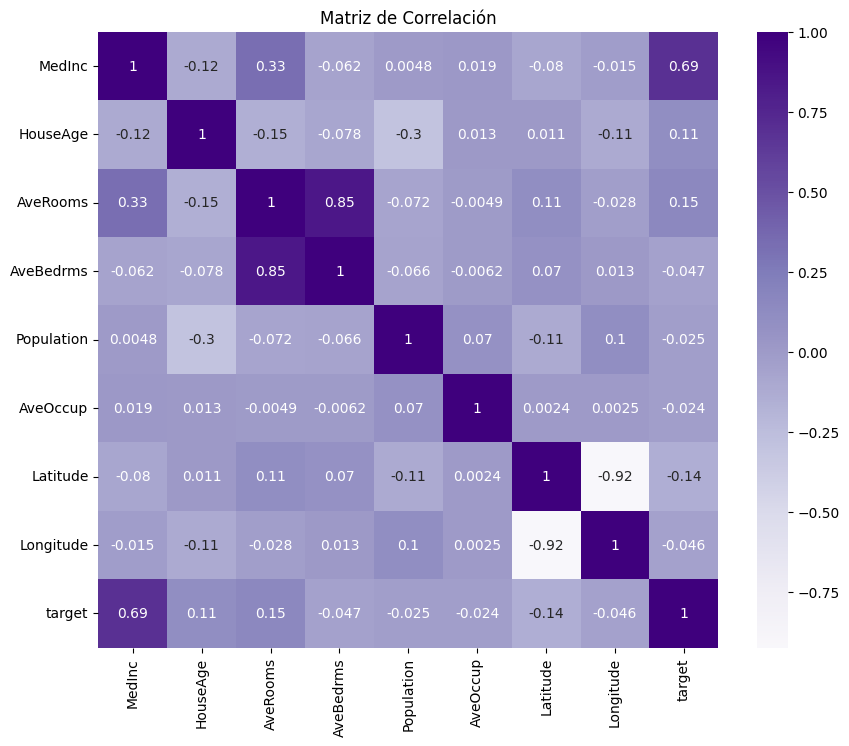

In [7]:
# 3. Visualización descriptiva
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(housing.columns[:]):
    housing[col].hist(bins=50, ax=axes[i], color='pink')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, cmap='Purples', center=0)
plt.title('Matriz de Correlación')
plt.show()


In [8]:
# 4. Prepocesamiento
from sklearn.model_selection import train_test_split

X = housing.drop('target', axis=1)
y = housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.metrics import r2_score

class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model

    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test

    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train)

    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )

        return df_temp

    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = regression_metrics(df_temp)
        df_metrics['r2'] =  round(r2_score(df_temp['y'],df_temp['yhat']),4)

        df_metrics['model'] = self.name_model

        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)

        list_betas = [
             ('beta_0',model_fit.intercept_)
                ]

        betas = model_fit.coef_

        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )

        result['model'] = self.name_model
        return result

In [10]:
# 5. Selección de modelo
# Modelos
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import neighbors

# modelos
reg_ridge = linear_model.Ridge(alpha=.5) #Modeo ridge
reg_lasso = linear_model.Lasso(alpha=0.1) #Modelo lasso
reg_knn = neighbors.KNeighborsRegressor(5,weights='uniform') #Modelo KNN
reg_tree = tree.DecisionTreeRegressor(max_depth=5) #Modelo árbol
list_models =[
    [reg_tree,'arbol'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
    [reg_knn,'knn'],
    # [reg_bayesian,'bayesian'],
]

In [11]:
frames_metrics = []
frames_coef = []

for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,y,0.2))
    if name_models in ['lineal','ridge','lasso']:
        frames_coef.append(fit_model.parameters(X,y,0.2))


In [12]:
# 6. Métricas
metrics = pd.concat(frames_metrics)
metrics

,mae,mse,rmse,mape,smape,r2,model
0,0.5223,0.5245,0.7242,32.6710,0.4925,0.5997,arbol
0,0.5332,0.5558,0.7456,31.9523,0.4843,0.5758,ridge
0,0.5816,0.6135,0.7833,36.1608,0.5311,0.5318,lasso
0,0.8128,1.1187,1.0577,53.4489,0.6966,0.1463,knn


In [13]:
results = {}
for model, name_models in list_models:
    results[name_models] = model.predict(X_test)
results

{'arbol': array([1.16857267, 1.27158128, 3.19958174, ..., 4.86065073, 1.27158128,
        1.64279735]),
 'ridge': array([0.71918133, 1.76398398, 2.70937531, ..., 4.46870752, 1.18768323,
        2.00926358]),
 'lasso': array([1.04628114, 1.61196314, 2.30822511, ..., 4.17618895, 1.64031173,
        1.81210646]),
 'knn': array([1.623 , 1.0822, 2.8924, ..., 2.5944, 1.649 , 2.005 ])}

In [14]:
# 7. Visualización de resultados del modelo
results = {}
for model, name_models in list_models:
      model.fit(X_train, y_train)
      results[name_models] = model.predict(X_test)


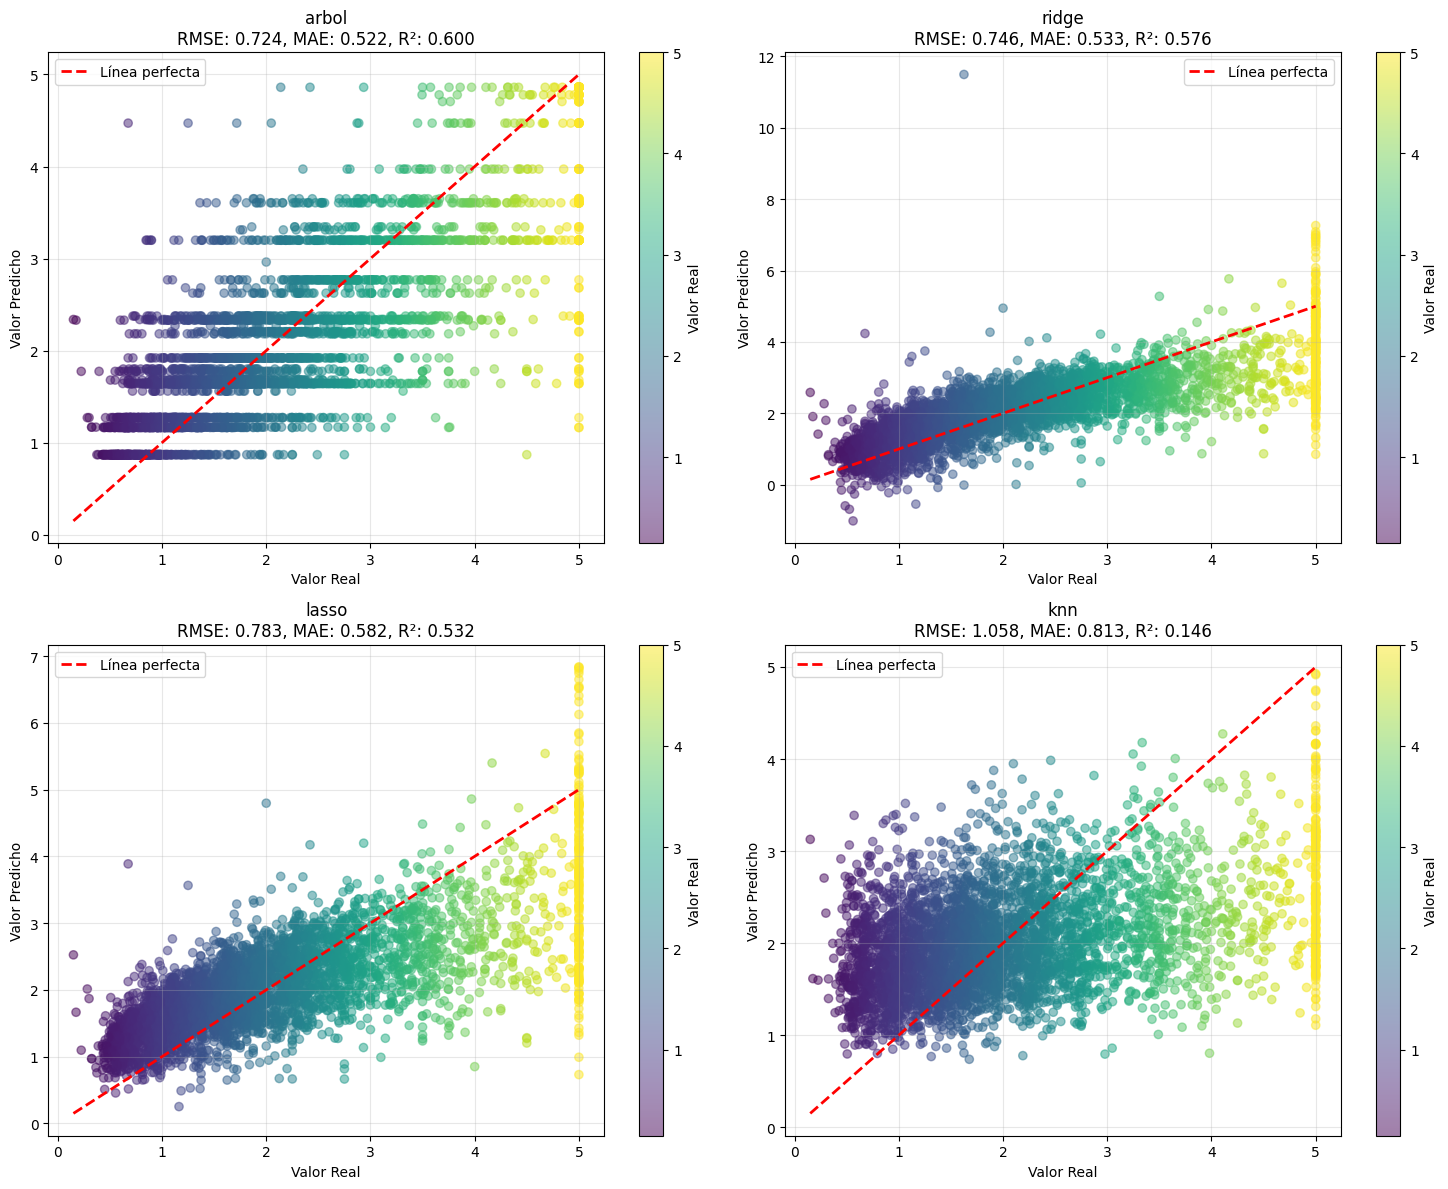

In [15]:
# Gráfica de dispersión
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

model_names = list(results.keys())

for i, model_name in enumerate(model_names):
    y_pred = results[model_name]
    model_metrics = metrics[metrics['model'] == model_name].iloc[0]
    rmse = model_metrics['rmse']
    mae = model_metrics['mae']
    r2 = model_metrics['r2']
    scatter = axes[i].scatter(y_test, y_pred, alpha=0.5, c=y_test, cmap='viridis')
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea perfecta')
    axes[i].set_xlabel('Valor Real')
    axes[i].set_ylabel('Valor Predicho')
    axes[i].set_title(f'{model_name}\nRMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[i], label='Valor Real')

plt.tight_layout()
plt.show()

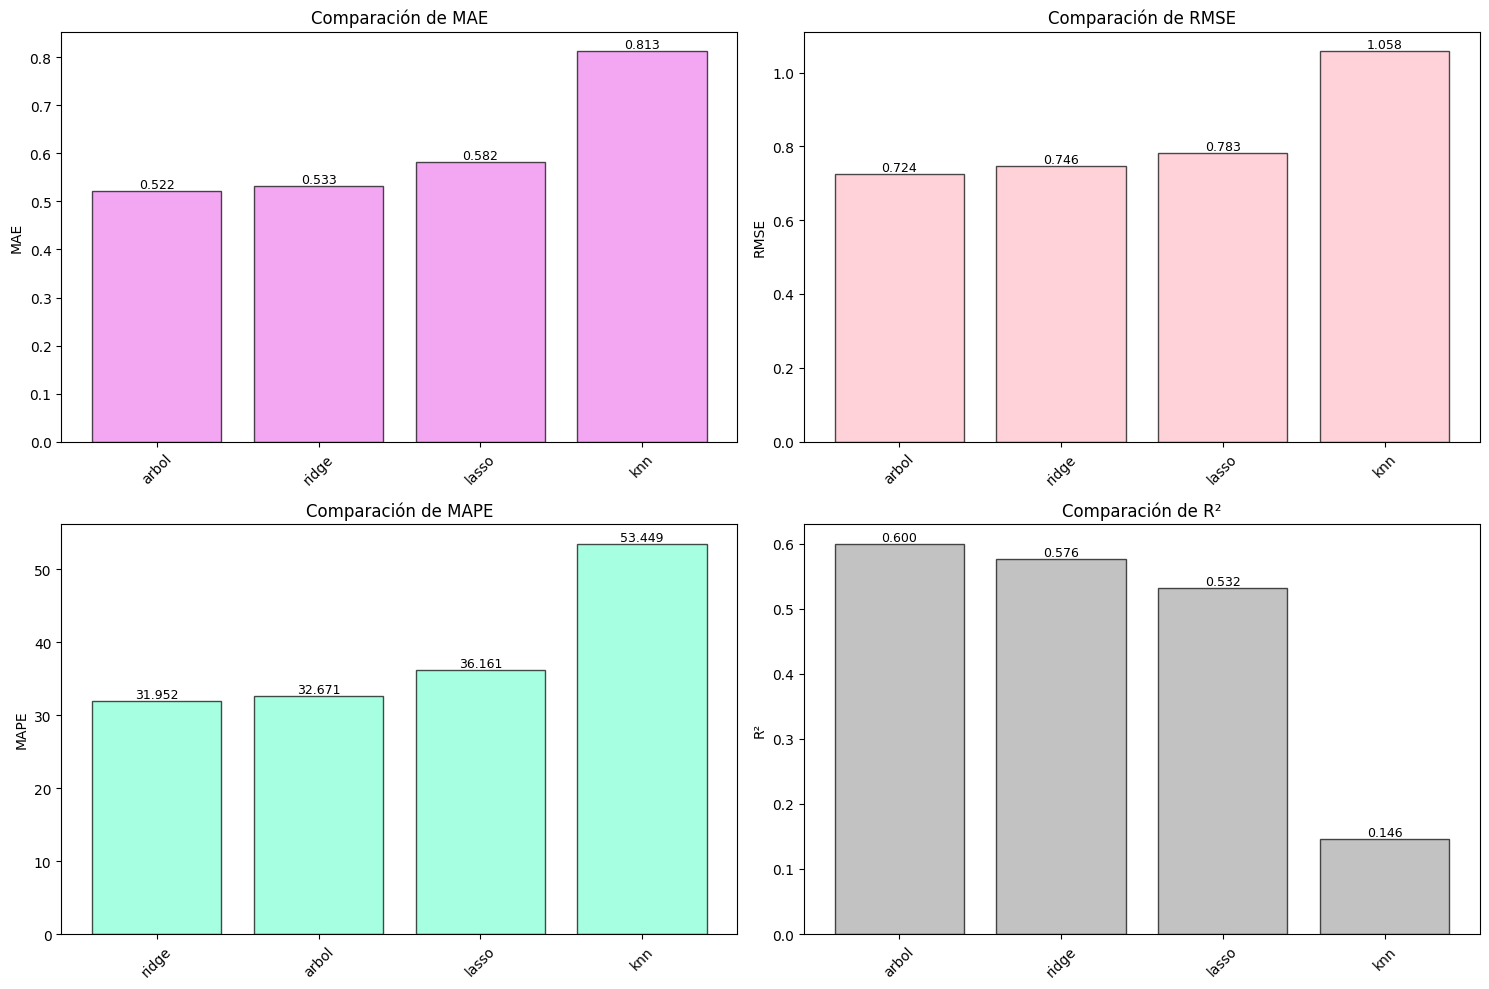

In [16]:
# Gráfico de métricas comparativas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metric_columns = ['mae', 'rmse', 'mape', 'r2']
metric_names = ['MAE', 'RMSE', 'MAPE', 'R²']
colors = ['violet', 'pink', 'aquamarine', 'darkgray']

for i, (metric_col, metric_name) in enumerate(zip(metric_columns, metric_names)):
    if metric_name == 'R²':
        sorted_metrics = metrics.sort_values(metric_col, ascending=False)
    else:
        sorted_metrics = metrics.sort_values(metric_col)

    bars = axes[i].bar(sorted_metrics['model'], sorted_metrics[metric_col],
                      color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Comparación de {metric_name}')
    axes[i].set_ylabel(metric_name)
    axes[i].tick_params(axis='x', rotation=45)
    for bar, value in zip(bars, sorted_metrics[metric_col]):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

8. Conclusiones

Juntando la información de ambos gráficos podemos notar que el mejor modelo es el árbol de decisión, a pesar de tener problemas, tiene el mejor error MAE, RMSE y R², seguido por el módelo Ridge que obtiene el segundo lugar en los errores anteriormente mencionados y el primer lugar en el error MAPE.

El peor de todos los modelos es el KNN, el cual tiene el peor valor para los errores anteriormente mencionados.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [19]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [20]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [21]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Los datos se distribuyen de la siguiente manera:


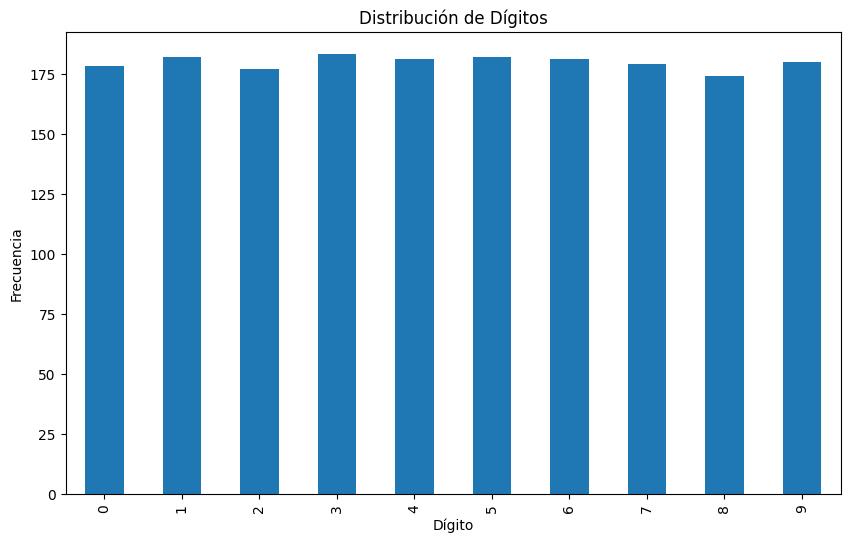

Memoria utilizada: 0.89 MB
Tipos de datos: int64 (números enteros)

Conteo por clase:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


In [22]:
print('Los datos se distribuyen de la siguiente manera:')
plt.figure(figsize=(10, 6))
digits['target'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Dígitos')
plt.xlabel('Dígito')
plt.ylabel('Frecuencia')
plt.show()
print(f"Memoria utilizada: {digits.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("Tipos de datos: int64 (números enteros)")
print(f"\nConteo por clase:\n{digits['target'].value_counts().sort_index()}")

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [23]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

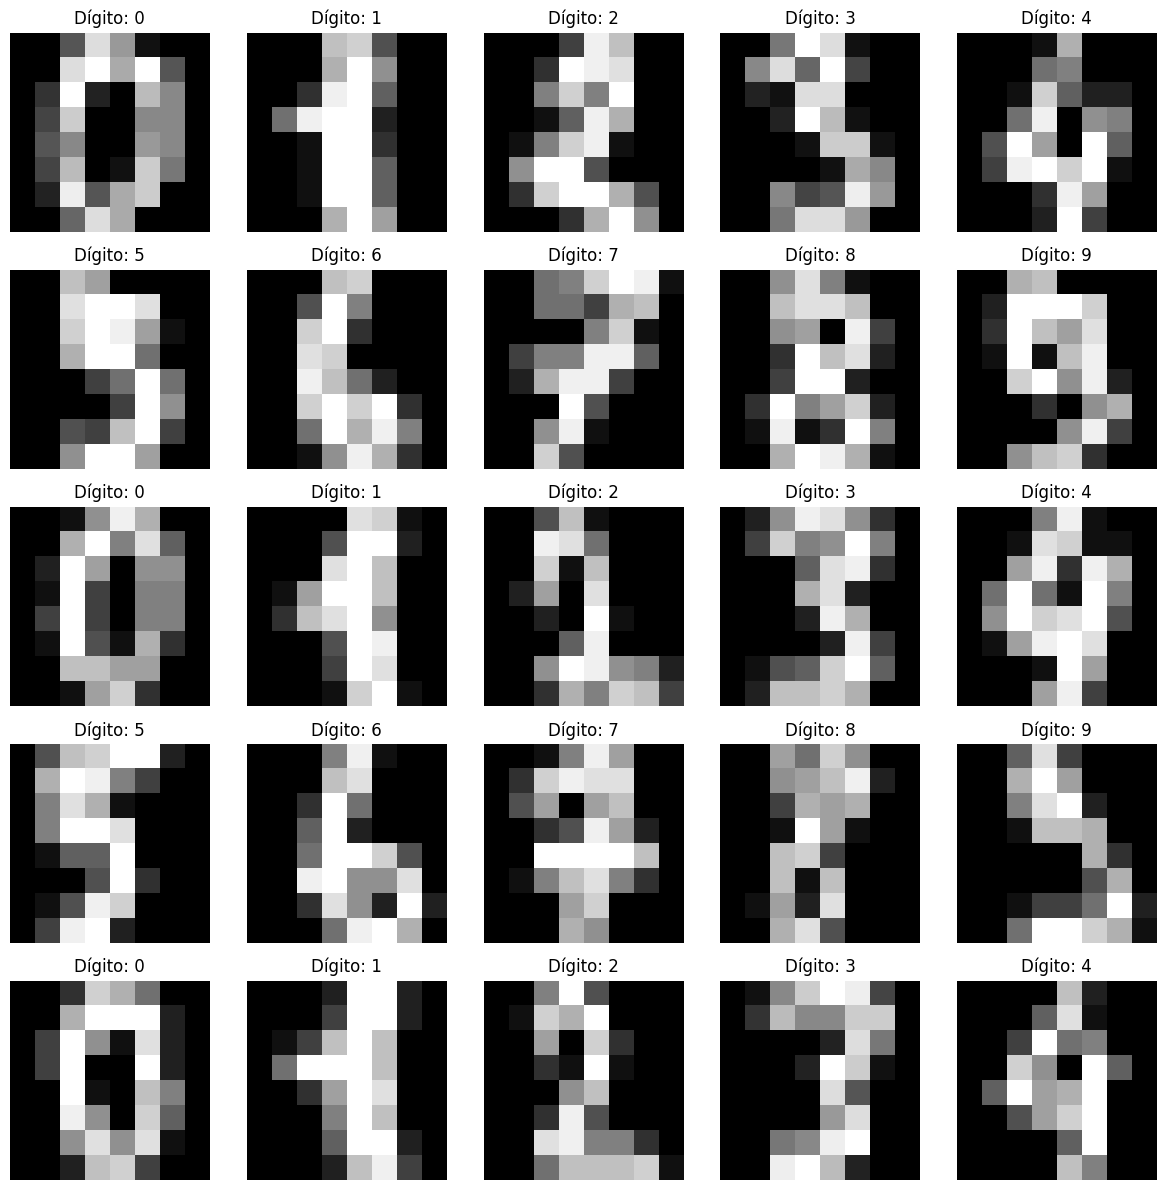

In [24]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx):
    for j in range(ny):
        index = i * ny + j
        if index < len(digits_dict['images']):
            axs[i, j].imshow(digits_dict['images'][index], cmap='gray')
            axs[i, j].set_title(f'Dígito: {digits_dict["target"][index]}')
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [25]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [26]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import time

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [28]:
models = {
    'Arbol de Decisión': tree.DecisionTreeRegressor(max_depth=5, random_state=42),
    'Ridge': linear_model.Ridge(alpha=0.5, random_state=42),
    'Lasso': linear_model.Lasso(alpha=0.1, random_state=42)
    }

In [29]:
results = {}
training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    training_time = end_time - start_time
    training_times[name] = training_time
    results[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

In [30]:
print("Métricas por modelo")

frames_metrics = []

for name, y_pred in results.items():
    print(f"\n {name}:")
    df_temp = pd.DataFrame({'y': y_test, 'yhat': y_pred})
    model_metrics = regression_metrics(df_temp)
    model_metrics['r2'] = r2_score(y_test, y_pred)
    model_metrics['model'] = name
    frames_metrics.append(model_metrics)

    print(f"   MAE: {model_metrics['mae'].values[0]:.4f}")
    print(f"   MSE: {model_metrics['mse'].values[0]:.4f}")
    print(f"   RMSE: {model_metrics['rmse'].values[0]:.4f}")
    print(f"   MAPE: {model_metrics['mape'].values[0]:.2f}%")
    print(f"   SMAPE: {model_metrics['smape'].values[0]:.4f}")
    print(f"   R²: {model_metrics['r2'].values[0]:.4f}")

Métricas por modelo

 Arbol de Decisión:
   MAE: 1.2222
   MSE: 3.5502
   RMSE: 1.8842
   MAPE: inf%
   SMAPE: nan
   R²: 0.5404

 Ridge:
   MAE: 1.4204
   MSE: 3.2587
   RMSE: 1.8052
   MAPE: inf%
   SMAPE: nan
   R²: 0.5781

 Lasso:
   MAE: 1.4499
   MSE: 3.3449
   RMSE: 1.8289
   MAPE: inf%
   SMAPE: nan
   R²: 0.5670


/tmp/ipython-input-3268839106.py:21: RuntimeWarning: invalid value encountered in scalar divide
  df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]
/tmp/ipython-input-3268839106.py:21: RuntimeWarning: invalid value encountered in scalar divide
  df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]
/tmp/ipython-input-3268839106.py:21: RuntimeWarning: invalid value encountered in scalar divide
  df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]


In [31]:
# 5. Consolidación de métricas - CORREGIDO
metrics_df = pd.concat(frames_metrics).sort_values('rmse')
metrics_df = metrics_df[['model', 'mae', 'mse', 'rmse', 'mape', 'smape', 'r2']]
metrics_df['training_time'] = metrics_df['model'].map(training_times)
metrics_df['training_time'] = metrics_df['training_time'].round(4)
metrics_df

,model,mae,mse,rmse,mape,smape,r2,training_time
0,Ridge,1.4204,3.2587,1.8052,inf,NaN,0.578136,0.0035
0,Lasso,1.4499,3.3449,1.8289,inf,NaN,0.566979,0.0065
0,Arbol de Decisión,1.2222,3.5502,1.8842,inf,NaN,0.540404,0.0171


In [32]:
best_model_name = metrics_df.iloc[0]['model']
best_model_metrics = metrics_df[metrics_df['model'] == best_model_name].iloc[0]

print("RANKING DE MODELOS (de mejor a peor):")
for i, (_, row) in enumerate(metrics_df.iterrows(), 1):
    print(f" {i}. {row['model']} - RMSE: {row['rmse']:.4f}, R²: {row['r2']:.4f}")

RANKING DE MODELOS (de mejor a peor):
 1. Ridge - RMSE: 1.8052, R²: 0.5781
 2. Lasso - RMSE: 1.8289, R²: 0.5670
 3. Arbol de Decisión - RMSE: 1.8842, R²: 0.5404


De esto podemos sacar que el mejor modelo para este caso sería el Ridge, esto pues cuenta con los mejores errores, en consecuencia, realiza una predicción buena para la mayoría de casos, además de contar con un tiempo intermedio, generando así un equilibrio entre estabilidad y rapidez.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [40]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from itertools import cycle, combinations

X_digits = digits.drop(columns="target").values
y_digits = digits["target"].values
target_names = [str(i) for i in range(10)]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.5, stratify=y_digits, random_state=0
)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.5, stratify=y_digits, random_state=0
)

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [37]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.